# Lab 2

# Content
* [Data Preparation](#data-preparation)
    - [Part 1. Data Processing](#data-preparation1)
    - [Part 2. Final Datasets](#data-preparation2)
* [Modeling and Evaluation](#model-and-evaluation)
    - [Part 1. Evaluation Metrics](#model-and-evaluation1)
    - [Part 2. Train and Test Splits](#model-and-evaluation2)
    - [Part 3. Models for Tasks](#model-and-evaluation3)
        - [Part 3.a. Models for Classification](#model-and-evaluation3a)
        - [Part 3.b. Models for Regression](#model-and-evaluation3b)
    - [Part 4. Model Analysis with Visualization](#model-and-evaluation4)
    - [Part 5. Model Comparison](#model-and-evaluation5)
    - [Part 6. Feature Importance](#model-and-evaluation6)
* [Deployment](#deployment)
* [Exceptional Work](#exceptional-work)

# Rubric

@class Here is the rubric for Lab 2.  You must have these EXACT sections in your submission, if you want me to grade it!  You may have as many subsections as you feel are necessary for each section. Lab 2 is due Sunday 3/14/21 by 11:59 PM.



 

Category 	Available 	Requirements
Total Points 	100	



Data Preparation Part 1	10	Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

Data Preparation Part 2	5	Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

Modeling and Evaluation 1	10	Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

Modeling and Evaluation 2	10	Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

Modeling and Evaluation 3	20	Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

Modeling and Evaluation 4	10	Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

Modeling and Evaluation 5	10	Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

Modeling and Evaluation 6	10	Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

Deployment	5	How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

Exceptional Work	10	You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

# Data Preparation <a id='data-preparation'/>

### Part 1. Data Processing <a id='data-preparation1'/>

##### Data Importing and Cleaning

In [1]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('https://raw.githubusercontent.com/olmosjorge28/DS7331_ML1_ASSINGMENTS/main/hotel_bookings.csv') # read in the csv file
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


In [2]:
# data info
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Upon initial inspection of the 31 attributes, we noticed the following,
1. Total of 7 attributes appears to have some missing data.
We decided to replace the missing value “__nan__ and “__Undefined__” with __MODE__ as they appear to be accidental
2. We decided to __remove__ “__agent__” and “__company__” attributes as they do not provide any valuable information for analysis
3. we decided to replace '__Undefined__' with '__SC__' under Meal attribute as they are synonymous. 
4. We classify the non-categorical attributes that are above and below 1.5 times the interquartile range of the dataset as __outliers__. 

Below is a list of all the attributes with missing values and the counts:
* agent- 16340
* company- 112593
* children- 4
* country- 488
* market_segment - 2
* meal - 1169
* distribution_channel – 5

There's an association between the distribution channel type and the agent and company attributes. 
1. If the distribution channel is from a Traveling Agent (__TA__) or Tour Operator (__TO__), then the agency company is supplied in the agent column. 
2. if the distribution channel is __Corporate__, then the company associated with the booking is populated under the company attribute. 
3. If the distribution is neither __Corporate__, __TA__ or __TO__ than both the __agent and company__ attributes will be __null__. 
4. For the meal attribute during our data investigation, we have found out that '__Undefined__' and '__SC__' are synonymous so we have decided to __replace__ '__Undefined__' with '__SC__'. 


To simplify our data exploration, we decided to __remove__ the __agent and company__ attributes as they don't provide any additional information beyond what already is provided in the distribution channel. 
Data cleaning for the above attributes will be followed. 

In [4]:
import math
from datetime import date


hotel_bookings_transform = hotel_bookings
# removing 'agent','company' and 'country'
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company', 'country'])

# For the remainder they appear to have been omitted accidentally and we decided to populate the missing values with the mode.
hotel_bookings[['children','country','market_segment','meal','distribution_channel']].mode() 


hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)

Additionally, the following attributes were __classified as objects__, however they're __categorical__ in nature so we have decided to encode each of these attributes with a corresponding number according to their alphabetical order:

- hotel - ['City Hotel', 'Resort Hotel']
- market_segment - ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA']
- meal - ['BB', 'FB', 'HB', 'SC']
- reservation_status - ['Canceled', 'Check-Out', 'No-Show']
- distribution_channel - ['Corporate', 'Direct', 'GDS', 'TA/TO']
- reserved_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']
- assigned_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']
- deposit_type - ['No Deposit', 'Non Refund', 'Refundable']
- country - [['ABW','AGO','AIA','ALB','AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO' 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRI', 'PRT', 'PRY', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV', 'SMR', 'SRB', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SYC', 'SYR', 'TGO', 'THA', 'TJK', 'TMP', 'TUN', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR', 'UMI', 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF', 'ZMB', 'ZWE']]
- customer_type - ['Contract', 'Group', 'Transient', 'Transient-Party']


In [5]:
# Encoding process

hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes

assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)

# Convert Date to Ordinal
import datetime as dt
hotel_bookings_transform['reservation_status_date'] = pd.to_datetime(hotel_bookings_transform['reservation_status_date'])
hotel_bookings_transform['reservation_status_date'] = hotel_bookings_transform['reservation_status_date'].map(dt.datetime.toordinal)

hotel_bookings_transform=hotel_bookings_transform.assign(booking_day_of_year = hotel_bookings_transform["arrival_date_year"].astype(str) + '-' + 
hotel_bookings_transform["arrival_date_month"].astype(str) + '-' +hotel_bookings_transform["arrival_date_day_of_month"].astype(str))
hotel_bookings_transform['booking_day_of_year']=pd.to_datetime(hotel_bookings_transform.booking_day_of_year)
hotel_bookings_transform['booking_day_of_year']=hotel_bookings_transform['booking_day_of_year'].map(lambda x: x.toordinal() - date(x.year, 1, 1).toordinal() + 1)


hotel_bookings_transform=hotel_bookings_transform.drop(columns=['arrival_date_year','reservation_status_date'])
#hotel_bookings_transform['booking_date']=hotel_bookings_transform['booking_date'].map(dt.datetime.toordinal)

##### Outlier removal
- First we decided to take a look the simple statistics of the continuous variables to see if they make sense. 
- __adr__ and __lead_time__ had minimum and maximum values that appear as data entry error.  
- __stays_in_week_nights__ and __stays_in_weekend_nights__ had too extreme maximum values when there are only seven days in a week. 
- __days_in_waiting_list__, __total_of_special_requests__ and __required_car_parking_spaces__ had reasonable data distribution. 
- After determining that the 4 continuous features(adr, lead_time, stays_week_nights, stays_weekend_nights) have extreme outliers, the 25% and 75% interquartile range (IQR) was utilized in order to identify and remove the outliers from the dataset. 
- Outliers that are positioned at above and below the 1.5 times the upper and lower limit of IQR are removed. 

In [6]:
# simple statistics of continuous features 
hotel_bookings_transform[['adr', 'lead_time','days_in_waiting_list','total_of_special_requests','required_car_parking_spaces','stays_in_week_nights','stays_in_weekend_nights']].describe()

,adr,lead_time,days_in_waiting_list,total_of_special_requests,required_car_parking_spaces,stays_in_week_nights,stays_in_weekend_nights
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,101.831122,104.011416,2.321149,0.571363,0.062518,2.500302,0.927599
std,50.535790,106.863097,17.594721,0.792798,0.245291,1.908286,0.998613
min,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.290000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,94.575000,69.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,126.000000,160.000000,0.000000,1.000000,0.000000,3.000000,2.000000
max,5400.000000,737.000000,391.000000,5.000000,8.000000,50.000000,19.000000


In [7]:
hotel_bookings_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int8   
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int8   
 12  market_segment  

##### Outlier removal using interquartile range

In [8]:
# 4 features selected that have outliers
cols = ['adr', 'lead_time','stays_in_week_nights','stays_in_weekend_nights'] 

Q1 = hotel_bookings_transform[cols].quantile(0.25)
Q3 = hotel_bookings_transform[cols].quantile(0.75)
IQR = Q3 - Q1

hotel_bookings_transform = hotel_bookings_transform[~((hotel_bookings_transform[cols] < (Q1 - 1.5* IQR)) |(hotel_bookings_transform[cols] > (Q3 + 1.5* IQR))).any(axis=1)]

In [9]:
# dataframe shape after outlier removal
hotel_bookings_transform.shape

(109425, 28)

##### Normalization

In [10]:
X_cls=hotel_bookings_transform.drop(columns=['is_canceled','reservation_status','meal'])
y_cls=hotel_bookings_transform.is_canceled

X_reg=hotel_bookings_transform.drop(columns=['adr','reservation_status','meal'])
y_reg=hotel_bookings_transform.adr

columns_cls = X_cls.columns
columns_reg = X_reg.columns

columns_cls, columns_reg

(Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies',
        'market_segment', 'distribution_channel', 'is_repeated_guest',
        'previous_cancellations', 'previous_bookings_not_canceled',
        'reserved_room_type', 'assigned_room_type', 'booking_changes',
        'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
        'required_car_parking_spaces', 'total_of_special_requests',
        'booking_day_of_year'],
       dtype='object'),
 Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
        'arrival_date_week_number', 'arrival_date_day_of_month',
        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
        'babies', 'market_segment', 'distribution_channel', 'is_repeated_guest',
        'previous_cancellations', 'previous_bookings_not_canceled',
        'reserved_room_t

In [11]:
from sklearn import preprocessing
scaler_cls = preprocessing.StandardScaler().fit(X_cls)
scaler_reg = preprocessing.StandardScaler().fit(X_reg)

X_cls_scaled = pd.DataFrame(scaler_cls.transform(X_cls),columns=columns_cls)
X_reg_scaled = pd.DataFrame(scaler_reg.transform(X_reg),columns=columns_reg)

In [12]:
X_cls_scaled

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,booking_day_of_year
0,1.468923,2.670098,0.162061,0.006789,-1.686903,-0.982013,-1.611971,0.266031,-0.239552,-0.079437,...,0.692165,0.413491,4.458505,-0.363223,-0.145555,-0.258425,-2.395267,-0.252738,-0.720113,-0.003609
1,1.468923,-0.945029,0.162061,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,-0.079437,...,-0.558870,0.413491,-0.340534,-0.363223,-0.145555,-0.258425,-0.555304,-0.252738,-0.720113,-0.003609
2,1.468923,-0.880280,0.162061,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.555304,-0.252738,-0.720113,-0.003609
3,1.468923,-0.869489,0.162061,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,0.008951,-0.252738,0.547924,-0.003609
4,1.468923,-0.869489,0.162061,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,0.008951,-0.252738,0.547924,-0.003609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109420,-0.680771,0.749225,0.480567,0.585847,1.735230,1.317388,1.198319,0.266031,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.246191,-0.252738,-0.720113,0.632897
109421,-0.680771,-0.793949,0.480567,0.585847,1.621159,1.317388,1.900891,0.266031,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.036680,-0.252738,1.815962,0.622462
109422,-0.680771,-0.772366,0.480567,0.585847,1.621159,1.317388,1.900891,0.266031,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.036680,-0.252738,-0.720113,0.622462
109423,-0.680771,-0.653660,0.480567,0.585847,1.735230,1.317388,1.900891,0.266031,-0.239552,-0.079437,...,1.317682,0.965637,-0.340534,-0.363223,-0.145555,-0.258425,1.473807,-0.252738,4.352036,0.632897


In [13]:
X_reg_scaled

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,booking_day_of_year
0,1.468923,-0.7542,2.670098,0.162061,0.006789,-1.686903,-0.982013,-1.611971,0.266031,-0.239552,...,-0.094611,0.692165,0.413491,4.458505,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113,-0.003609
1,1.468923,-0.7542,-0.945029,0.162061,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,...,-0.094611,-0.558870,0.413491,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113,-0.003609
2,1.468923,-0.7542,-0.880280,0.162061,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113,-0.003609
3,1.468923,-0.7542,-0.869489,0.162061,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,0.547924,-0.003609
4,1.468923,-0.7542,-0.869489,0.162061,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,0.547924,-0.003609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109420,-0.680771,-0.7542,0.749225,0.480567,0.585847,1.735230,1.317388,1.198319,0.266031,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113,0.632897
109421,-0.680771,-0.7542,-0.793949,0.480567,0.585847,1.621159,1.317388,1.900891,0.266031,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,1.815962,0.622462
109422,-0.680771,-0.7542,-0.772366,0.480567,0.585847,1.621159,1.317388,1.900891,0.266031,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113,0.622462
109423,-0.680771,-0.7542,-0.653660,0.480567,0.585847,1.735230,1.317388,1.900891,0.266031,-0.239552,...,-0.094611,1.317682,0.965637,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,4.352036,0.632897


Verifying each feature has a mean of zero and the standard deviation should be 1 for classification:

In [14]:
print('classification scaler mean:')
print(X_cls_scaled.mean(axis=0),'\n')
print('classification scaler std:')
print(X_cls_scaled.std(axis=0),'\n')

classification scaler mean:
hotel                             1.353651e-13
lead_time                         2.897664e-16
arrival_date_month                2.358346e-14
arrival_date_week_number          6.551222e-15
arrival_date_day_of_month         1.938530e-16
stays_in_weekend_nights           6.092845e-14
stays_in_week_nights             -5.386664e-14
adults                            1.612851e-14
children                         -1.210227e-14
babies                           -1.689242e-14
market_segment                    3.368001e-14
distribution_channel             -1.324174e-13
is_repeated_guest                 2.881953e-14
previous_cancellations           -2.629231e-14
previous_bookings_not_canceled   -9.483673e-15
reserved_room_type               -5.514433e-15
assigned_room_type                2.527050e-14
booking_changes                  -1.655952e-14
deposit_type                     -1.040636e-13
days_in_waiting_list             -1.006852e-14
customer_type                   

Verifying each feature has a mean of zero and the standard deviation should be 1 for regression:

In [15]:
print('regression scaler mean:')
print(X_reg_scaled.mean(axis=0),'\n')
print('regression scaler std:')
print(X_reg_scaled.std(axis=0),'\n')

regression scaler mean:
hotel                             1.353651e-13
is_canceled                       2.154678e-13
lead_time                         2.897664e-16
arrival_date_month                2.358346e-14
arrival_date_week_number          6.551222e-15
arrival_date_day_of_month         1.938530e-16
stays_in_weekend_nights           6.092845e-14
stays_in_week_nights             -5.386664e-14
adults                            1.612851e-14
children                         -1.210227e-14
babies                           -1.689242e-14
market_segment                    3.368001e-14
distribution_channel             -1.324174e-13
is_repeated_guest                 2.881953e-14
previous_cancellations           -2.629231e-14
previous_bookings_not_canceled   -9.483673e-15
reserved_room_type               -5.514433e-15
assigned_room_type                2.527050e-14
booking_changes                  -1.655952e-14
deposit_type                     -1.040636e-13
days_in_waiting_list             -1.

##### Feature Selection for Classification

In this section we're looking for covariates and removing some of the features that are highly correlated with other features in the dataset.

In [16]:
correlated_features = []
correlation_matrix = X_cls_scaled.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            
            correlated_features.append([correlation_matrix.columns[j],colname])
            
            
print('Highly correlated feature pairs are: {}'.format(correlated_features))

Highly correlated feature pairs are: [['arrival_date_month', 'arrival_date_week_number'], ['market_segment', 'distribution_channel'], ['reserved_room_type', 'assigned_room_type'], ['arrival_date_month', 'booking_day_of_year'], ['arrival_date_week_number', 'booking_day_of_year']]


Droping features chosen from coorelations analysis:

In [17]:
# Decided to drop the following features from the highly correlated pairs
X_cls_scaled=X_cls_scaled.drop(['distribution_channel', 'arrival_date_month','assigned_room_type','booking_day_of_year'], axis=1)

We are running an RFECV analysis for feature elimination using Random Forest. Each loop in RFECV attempts to elimante dependencies and collinearities that may exist and only keeps those features that generate the highest test score ('accuracy'). The process is reapeated until it reaches the predetermined number of features for selection.

In [18]:
# Using randomforest to run RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier(random_state=10)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(X_cls_scaled, y_cls)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=10), scoring='accuracy')

In [19]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 13


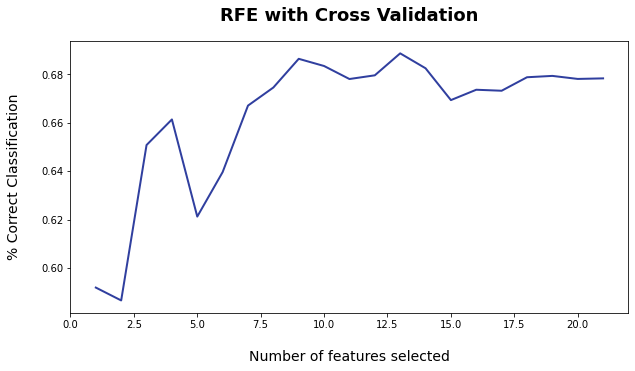

In [20]:
# Plotting RFE result

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('RFE with Cross Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=2)

plt.show()

In [21]:
# Identifying which feature is Selected(= identified as True)

print(X_cls_scaled.columns[np.where(rfecv.support_ == True)[0]])

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'market_segment',
       'previous_cancellations', 'reserved_room_type', 'booking_changes',
       'deposit_type', 'customer_type', 'adr', 'total_of_special_requests'],
      dtype='object')


In [22]:
# Dropping those features that are identified as not important
X_cls_sel=X_cls_scaled[X_cls_scaled.columns[np.where(rfecv.support_ == True)[0]]]

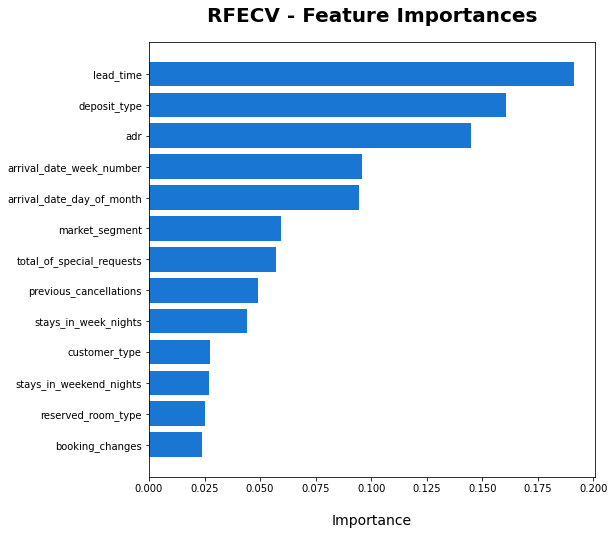

In [23]:
# Plotting features in the order of importance 

dset = pd.DataFrame()
dset['attr'] = X_cls_sel.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)


plt.figure(figsize=(8, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

##### Feature Selection for Regression

In [24]:
correlated_features = []
correlation_matrix = X_reg_scaled.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            
            correlated_features.append([correlation_matrix.columns[j],colname])
            
            
print('Highly correlated feature pairs are: {}'.format(correlated_features))

Highly correlated feature pairs are: [['arrival_date_month', 'arrival_date_week_number'], ['market_segment', 'distribution_channel'], ['reserved_room_type', 'assigned_room_type'], ['arrival_date_month', 'booking_day_of_year'], ['arrival_date_week_number', 'booking_day_of_year']]


In [25]:
X_reg_scaled=X_reg_scaled.drop(['distribution_channel', 'arrival_date_month','assigned_room_type','booking_day_of_year'], axis=1)

In [26]:
# Using randomforest to run RFE

from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import ShuffleSplit 
from sklearn.ensemble import RandomForestRegressor

# rfc = linear_model.Lasso(alpha=0.1, random_state=10)
rfc = RandomForestRegressor(random_state=10)
# rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(3), scoring='r2')

rfecv = RFECV(estimator=rfc, step=1, cv=ShuffleSplit(n_splits=5, test_size=0.20, random_state=10), scoring='r2')

rfecv.fit(X_reg_scaled, y_reg)

RFECV(cv=ShuffleSplit(n_splits=5, random_state=10, test_size=0.2, train_size=None),
      estimator=RandomForestRegressor(random_state=10), scoring='r2')

In [27]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 21


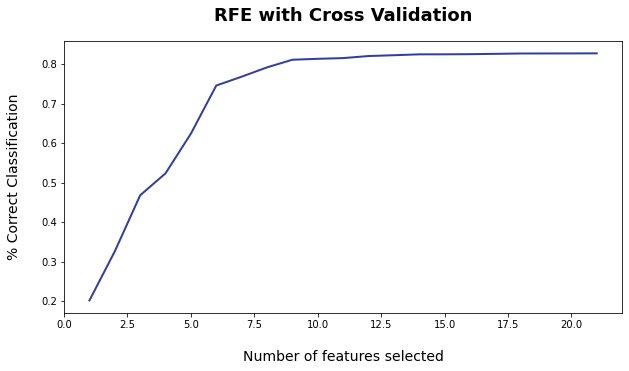

In [28]:
# Plotting RFE result

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('RFE with Cross Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=2)

plt.show()

In [29]:
# Identifying which feature is Selected(= identified as True)

print(X_reg_scaled.columns[np.where(rfecv.support_ == True)[0]])

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'market_segment', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [30]:
# Dropping those features that are identified as not important
X_reg_sel=X_reg_scaled[X_reg_scaled.columns[np.where(rfecv.support_ == True)[0]]]

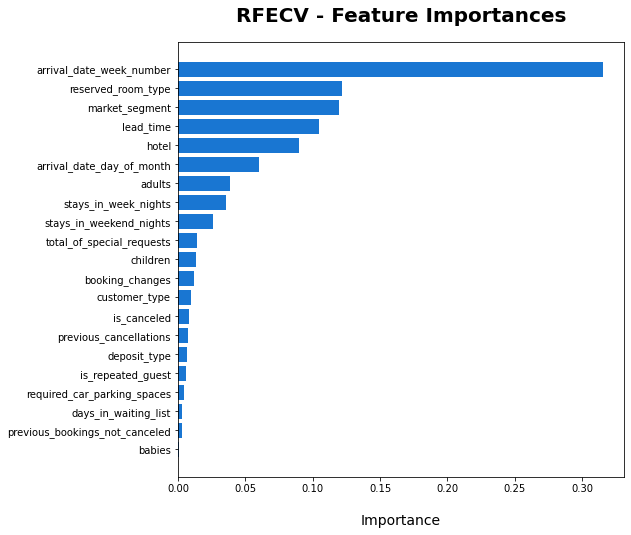

In [31]:
# Plotting features in the order of importance 

dset = pd.DataFrame()
dset['attr'] = X_reg_sel.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)


plt.figure(figsize=(8, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

### Part 2. Final Datasets <a id='data-preparation2'/>

### `Describe the final dataset that is used for classification/regression`

We have two tasks: one for classification and one for regression. Thus we prepared two separate dataset for classification and regression as the output of the Recursive feature engineering (RFE) will be different based upon the different target variable.

Classification task is to predict the cancelled booking based on the features we extraced. Our target variable is is_canceled
- Dataset for __classification__ had a total of 13 features selected. 

Regression task is to predict the average daily rate of booking, ADR, based on the features we extraced. Our target variable is adr.
- Dataset for __regression__ had a total of 21 features selected. 

##### Dataset for Classification

In [32]:
X_cls_sel.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,total_of_special_requests
0,2.670098,0.006789,-1.686903,-0.982013,-1.611971,-1.511410,-0.105015,0.692165,4.458505,-0.363223,-0.258425,-2.395267,-0.720113
1,-0.945029,0.006789,-1.686903,-0.982013,-0.909399,-1.511410,-0.105015,-0.558870,-0.340534,-0.363223,-0.258425,-0.555304,-0.720113
2,-0.880280,0.006789,-1.686903,-0.982013,-0.909399,-2.293503,-0.105015,-0.558870,-0.340534,-0.363223,-0.258425,-0.555304,-0.720113
3,-0.869489,0.006789,-1.686903,-0.982013,-0.206826,0.834868,-0.105015,-0.558870,-0.340534,-0.363223,-0.258425,0.008951,0.547924
4,-0.869489,0.006789,-1.686903,-0.982013,-0.206826,0.834868,-0.105015,-0.558870,-0.340534,-0.363223,-0.258425,0.008951,0.547924


    For Classification, we ran RFECV with Random forest and extract below features:
- lead_time
- deposit_type
- adr
- arrival_date_week_number
- arrival_date_day_of_month
- market_segment
- total_of_special_requests
- stays_in_week_nights
- previous_cancellations
- stays_in_weekends_nights
- customer_type
- reserved_room_type
- booking_changes   

##### Dataset for Regression

In [33]:
X_reg_sel.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,1.468923,-0.7542,2.670098,0.006789,-1.686903,-0.982013,-1.611971,0.266031,-0.239552,-0.079437,...,-0.187073,-0.105015,-0.094611,0.692165,4.458505,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113
1,1.468923,-0.7542,-0.945029,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,-0.079437,...,-0.187073,-0.105015,-0.094611,-0.558870,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113
2,1.468923,-0.7542,-0.880280,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,-0.079437,...,-0.187073,-0.105015,-0.094611,-0.558870,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113
3,1.468923,-0.7542,-0.869489,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,-0.079437,...,-0.187073,-0.105015,-0.094611,-0.558870,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,0.547924
4,1.468923,-0.7542,-0.869489,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,-0.079437,...,-0.187073,-0.105015,-0.094611,-0.558870,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,0.547924


    For Regression, we ran RFECV with Random Regressor and extract below features
- arrival_date_week_number
- reserved_room_type
- lead_time
- hotel
- market_segment
- arrival_date_day_of_month
- children
- adults
- stays_in_week_nights
- stays_in_weekends_nights
- booking_changes
- total_of_special_requests
- days_in_waiting_list
- customer_type
- is_canceled
- deposit_type
- previous_cancellations
- is_repeated_guest
- required_car_parking_spaces

# Modeling and Evaluation <a id='model-and-evaluation'/>

### Part 1: Evaluation Metrics <a id='model-and-evaluation1'/>

### `Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.`

#### Classification model
    1.Classification evaluation metric is quite different from regression performance metric.
    2.Classification is to identify which class of the new observation belongs to. 
    3.Commonly used classification evaluation metrics are;
        a.Accuracy
        b.Precision and recall
        c.F1-score
        d.AUC_ROC

   __Methodology we chose__: 
        For our classification models we have a binary target and we're going to use __f-score__ as it is one of best suited metrics for binary classifications. We will also be looking at the overall fitness with an __ROC curve__ to look at the performance of the binary prediction as well as __PR AUC | Average Precision Curve__ to investigate the positive predictions made since our data has an imbalance.
    
    -  The accuracy number is not the best measurement because it is subject to data imbalance
    -  Recall and Precision are subject to Type I and Type II errors
    -  Type I Error is Prediction is Positive but result is Negative
    -  Type II Error is Prediction is Negative but result is Positive
    -  F-1 score is the harmonic mean of the Recall and Precision thus will be a good candidate for classification. 
    -  ROC (Receiver Operating Characteristic) Curve summarizes the performance of a binary classification model on the positive class.
    -  PR AU | Average Precision Curve quantifies the number of correct positive predictions made
    -  If the classification model AUC is less than 0.5, then the model is worse than random estimation. Therefore,          maximize the AUC will give a reliable evaluation of the classification model 

#### Regression model
    1.Regression measures the relationships between a certain number of features (independent variables ) and the target variables(dependent variables.
    2.Commonly used regression evaluation metric are;
        a.Mean Absolute Error (MAE)
        b.Mean Square Error ( MSE)
        c.Roof Mean Square Error (RMSE)
        d.R-Squared
        e.Adjusted R-Squared

 __Methodology we chose__: 
    We chose to use __Roof Mean Square Error (RMSE)__
    
    -  The essence of Regression model is the measurement of errors on prediction.
    -  MSE will inflate the error terms if the error is large.
    -  MSE should be used for the model training. 
    -  RMSE should be used for the regression prediction model as the result is on the same scale as predicted original unit due to the Root of the Square. 


### Part 2: Train and Test Splits <a id='model-and-evaluation2'/>

### `Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.`

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import train_test_split

X_clas_train, X_clas_test, y_clas_train, y_clas_test=train_test_split(X_cls_sel, y_cls, test_size=0.2, random_state=10)

cv_cls = StratifiedShuffleSplit(n_splits=10, test_size= 0.2, random_state=10)

    We use training and testing splits with StratifiedShuffleSplit for Classification. StratifiedShuffleSplit is good when there are imbalance weight of classes. Our target, is_canceled, feature has more weight of positive, non-canceled, then the negative, canceled, so we choosed the StratifiedShuffleSplit. We applied 10 folds and 80% train and 20% test size.

In [42]:
from sklearn.model_selection import TimeSeriesSplit
import math

length = len(X_reg_sel)
index = math.floor(length*.9)


X_reg_train =  X_reg_sel.iloc[:index]
X_reg_test = X_reg_sel.iloc[index:length]
y_reg_train =   y_reg.iloc[:index]
y_reg_test = y_reg.iloc[index:length]

max_size = math.floor(len(X_reg_train)/10)

cv_reg = TimeSeriesSplit(max_train_size=max_size, n_splits=10)

    We use training and testing splits with TimeSeriesSplit because our dataset is timeseries data from 2015 to 2017. Since it is timeseries data, test indices must be higher than before in each split. In this case, shuffling in cross validator is not appropriate to use. Thus we use TimeSeriesSplit with 10 splits and we set max size of train to be 11000, approximately 10% of total data. 

### Part 3. Models for Tasks

### `Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!`

#### Part 3.a: Models for Classification <a id='model-and-evaluation3a'/>

##### KNN

First model we used for Classification task is KNN, K-Nearest Neighborhood Classifier. We applied tuning parameters to adjust our model. 

For number of neighbors, we tried [3, 5, 11, 19]. For weight, we tried uniform, that all points in each neighborhood are weighted equally, and distance, that weight points are applied by the inverse of their distance. For distance metrics we tried euclidean and mahattan to calculate the neightbors. Lastly for the algorithm we used auto to a use appropriate algorithm to run the model and to reduce computational cost.

After running the model, our best KNN Model is :
- KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

In [168]:
from sklearn import metrics as mt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score


scoring = {'PR_AUC': make_scorer(average_precision_score), 
           'Accuracy': make_scorer(accuracy_score) , 
           'F1': make_scorer(f1_score), 
           'AUC': make_scorer(roc_auc_score)}

grid_params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto']
}
#using grid search value
KNN_grid_search = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    scoring=scoring,
    cv = cv_cls,
    refit='PR_AUC', 
    return_train_score=True,
    n_jobs = -1
)

knn_clf = KNN_grid_search.fit(X_clas_train,y_clas_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [169]:
knn_clf.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

In [170]:
knn_clf.best_score_

0.8109781300208629

In [171]:
knn_clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

##### Random Forest

Second model we used for Classification task is Random Forest Classifier. For our tuning parameters, we used max_depth, max_features, max_samples_leaf, min_samples_split, and n_estimators.

We used 50 and 100 for max_depth size to get enough number of node sizes on our tree and to reduce computationl cost. Max_features are set as auto and None. Since we already ran the feature selection with RandomForest we also applied the None for max_features. Min_samples_leaf, the minimum number of samples required to be at a leaf node, is set as [1, 2, 4] and min_samples_split, the minimum number of samples required to split an internal node, is set as [2, 5, 10] in order to branches the nodes out. The number of tree, n_estimators, is set as [10, 100]. Lastly, oob_score we ran both True and False to see if using out of bag sample helps the model.

After running the model, our best Random Forest Model is :
- <code>{'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'oob_score': False}</code>


In [43]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

scoring = {'PR_AUC': make_scorer(average_precision_score), 
           'Accuracy': make_scorer(accuracy_score) , 
           'F1': make_scorer(f1_score), 
           'AUC': make_scorer(roc_auc_score)}

grid_params = {
 'max_depth': [50,100],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 100],
 'oob_score': [True,False]
}


#using grid search value
random_forest_gridsearch = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    verbose = 1,
    cv = cv_cls,
    scoring=scoring,
    refit='PR_AUC', 
    return_train_score=True,
    n_jobs = -1
)

rf_clf = random_forest_gridsearch.fit(X_clas_train, y_clas_train)
results = rf_clf.cv_results_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 17.8min finished


In [47]:
rf_clf.best_estimator_

RandomForestClassifier(max_depth=100)

In [50]:
rf_clf.best_params_

{'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'oob_score': False}

In [67]:
rf_clf.cv_results_['mean_train_Accuracy'][rf_clf.best_index_]

0.9905057687914095

Accuracy 0.860178204249486


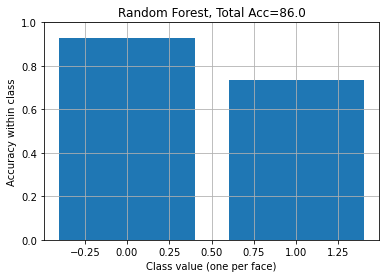

In [71]:
from sklearn import metrics as mt

yhat= rf_clf.best_estimator_.predict(X_clas_test)
total_accuracy = mt.accuracy_score(y_clas_test, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y_clas_test,yhat,title="Random Forest")

##### Logistic Regression

Third model we used for Classification task is Logistic Regression. For our tuning parameters, we used C value and class_weight.

C value is inverse of regularization strength which will specify the regualization, and we provided wide range of C value to create best model. Then we adjust class_weight param. Since out data set has unbalanced weight on certain columns, we wanted to use 'balanced' weight as well. We also decided to extend the number of iterations to 500 and 1000 to see which model performed better.

After running the model, our best Logistic Regression Model is :
- <code>
    {'C': 10,
 'class_weight': 'none',
 'max_iter': 500,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs'}
</code>

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

scoring = {'PR_AUC': make_scorer(average_precision_score), 
           'Accuracy': make_scorer(accuracy_score) , 
           'F1': make_scorer(f1_score), 
           'AUC': make_scorer(roc_auc_score)}

grid_params = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced','none']
              ,'random_state': [10]
              ,'solver': ['lbfgs'] #default
              ,'max_iter':[500,1000]
             }

logistic_gridsearch = GridSearchCV(
    LogisticRegression(),
    grid_params,
    verbose = 1,
    cv = cv_cls,
    scoring=scoring,
    refit='PR_AUC', 
    return_train_score=True,
    n_jobs = -1
)

lg_clf = logistic_gridsearch.fit(X_clas_train, y_clas_train)

results = lg_clf.cv_results_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   18.3s finished


In [60]:
lg_clf.best_estimator_

LogisticRegression(C=10, class_weight='none', max_iter=500, random_state=10)

In [62]:
lg_clf.best_index_

18

In [56]:
lg_clf.best_params_

{'C': 10,
 'class_weight': 'none',
 'max_iter': 500,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs'}

In [77]:
lg_clf.cv_results_['mean_train_Accuracy'][lg_clf.best_index_]

0.7881268562942654

Accuracy 0.7861092072195568


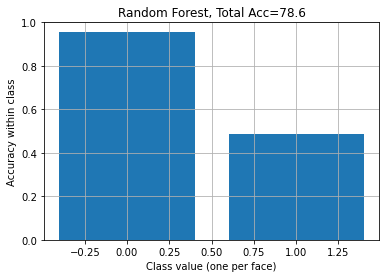

In [73]:
from sklearn import metrics as mt

yhat= lg_clf.best_estimator_.predict(X_clas_test)
total_accuracy = mt.accuracy_score(y_clas_test, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y_clas_test,yhat,title="Random Forest")

##### Decision Tree

Fourth model we used for Classification task is Decision Tree. For our tuning parameters, we used criterion, max_depth, max_features, max_samples_leaf, min_samples_split, and class_weight.

Criterion parameter is the function to measure the quality of a split: “gini” for the Gini impurity and “entropy” for the information gain. We applied both on our parameters to build model. We used 50 for max_depth size to get enough number of node sizes on our tree and to reduce computationl cost. Max_features are set as auto and None. Since we already ran the feature selection with RandomForest we also applied the None for max_features. Min_samples_leaf, the minimum number of samples required to be at a leaf node, is set as [1, 2, 4] and min_samples_split, the minimum number of samples required to split an internal node, is set as [2, 5, 10] in order to branches the nodes out. Lastly, we adjust class_weight param. Since our data set has unbalanced weight on certain columns, we wanted to use 'balanced' weight as well.

After running the model, our Decision Tree Model is :
- <code>{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}</code>

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

scoring = {'PR_AUC': make_scorer(average_precision_score), 
           'Accuracy': make_scorer(accuracy_score) , 
           'F1': make_scorer(f1_score), 
           'AUC': make_scorer(roc_auc_score)}

grid_params = {
    "criterion": ['gini','entropy'],
    'max_depth': [50],
    'max_features': ['auto', 'None'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced','none']
}


decision_tree_grid = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"),
                                  grid_params,
                                  verbose = 1,
                                  cv = cv_cls,
                                  scoring=scoring,
                                  refit='PR_AUC', 
                                  return_train_score=True,
                                  n_jobs = -1)


dt_clf = decision_tree_grid.fit(X_clas_train, y_clas_train)

results = dt_clf.cv_results_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   30.0s finished


In [75]:
dt_clf.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, max_features='auto')

In [76]:
dt_clf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [78]:
dt_clf.cv_results_['mean_train_Accuracy'][decision_tree_grid.best_index_]

0.9900945282156728

Accuracy 0.8102353209961161


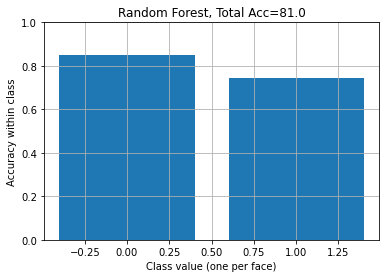

In [79]:
from sklearn import metrics as mt

yhat= decision_tree_grid.best_estimator_.predict(X_clas_test)
total_accuracy = mt.accuracy_score(y_clas_test, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y_clas_test,yhat,title="Random Forest")

###### Decision Tree Visualization

Only the top 3 levels are shown for its simplicity. From the root, a node is created along the decision tree where a question on a specific feature with a threshold is asked. This action divides the data into smaller subsets. Each node is comes with a gini score, which is the metric that quantifies the purity of the node/leaf. When gini is nonzero positive, it means that the samples contained within the root node belong to different classes. The value tells you how many samples at the given node fall into each category of 'Is_canceled' and the outcome is reflected in the class. The process of setting multiple thresholds and determining the best split based on the impurity of the gini is repeated until the root node is determined and the tree is grown to a depth of one.

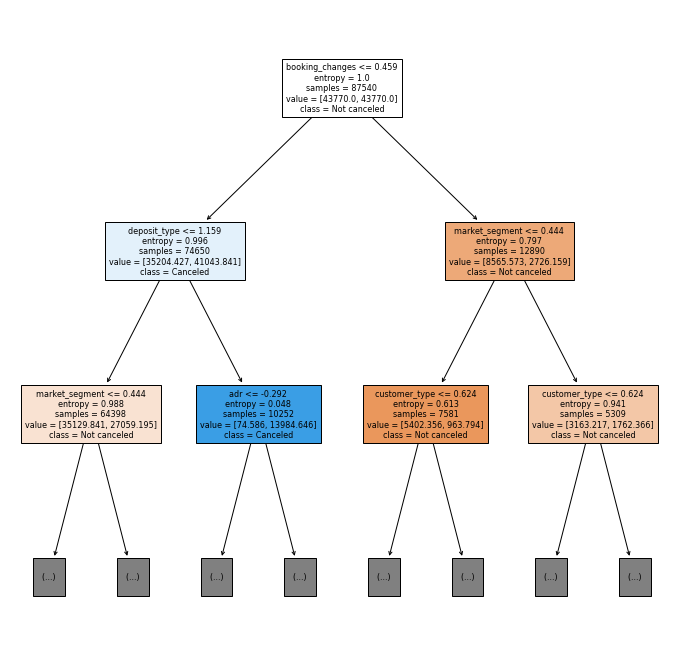

In [88]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# Visualizing tree using only the top 4 branches.
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(decision_tree_grid.best_estimator_, 
               fontsize=8, 
               filled=True, 
               feature_names=X_clas_train.columns,
               class_names=['Not canceled','Canceled'],
                max_depth=2)
plt.show()

##### Naive Bayes

In the last model, we used the Naïve Bayes for the Classification Task.  We used two algorithm models of Naive Bayes, Gaussian and Bernoulli. GaussianNB is implemented for the Gaussian Naive Bayes. BernoulliNB is implemented for the naive Bayes training and classification algorithms for the data that has multivariate Bernoulli distributions. For BernoulliNB, we adjusted alpha param from 0.01 to 1 to apply smoothing parameters to our model.

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

clf_gnb = GaussianNB()
clf_bnb = BernoulliNB()
clf_bnb1 = BernoulliNB(alpha=0.1)
clf_bnb2 = BernoulliNB(alpha=0.01)

yhat = np.zeros(y_cls.shape) # we will fill this with predictions
labels = [
    'GaussianNB',
    'BernoulliNB',
    'BernoulliNB with alpha 0.1',
    'BernoulliNB with alpha 0.01',
]
yhatDict = {
    'GaussianNB': np.zeros(y_cls.shape),
    'BernoulliNB': np.zeros(y_cls.shape),
    'BernoulliNB with alpha 0.1': np.zeros(y_cls.shape),
    'BernoulliNB with alpha 0.01': np.zeros(y_cls.shape)
}

for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    for clf, lab in zip([clf_gnb, clf_bnb, clf_bnb1, clf_bnb2], labels):
        clf.fit(X_train, y_train)
        yhatDict[lab][test_indices] = clf.predict(X_test)

Accuracy 0.7535846470185058


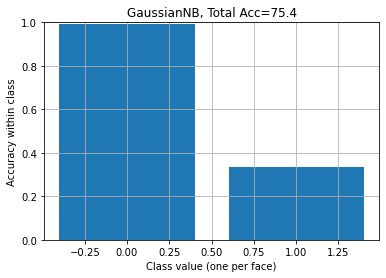

Accuracy 0.7609961160612292


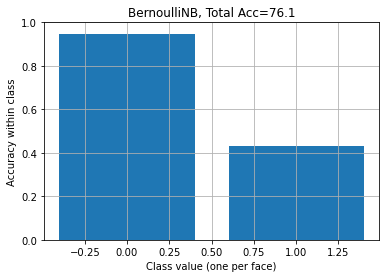

Accuracy 0.7609961160612292


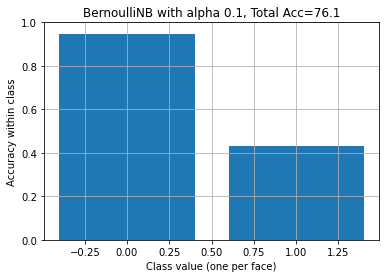

Accuracy 0.7609961160612292


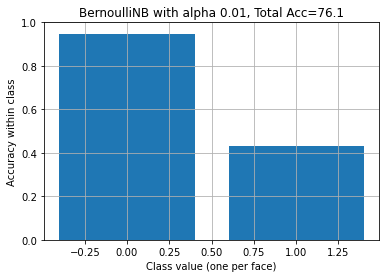

In [116]:
for clf, lab in zip([clf_gnb, clf_bnb, clf_bnb1, clf_bnb2], labels):
    total_accuracy = mt.accuracy_score(y_cls, yhatDict[lab])
    print ('Accuracy', total_accuracy)
    plot_class_acc(y_cls,yhatDict[lab],title=lab)

#### Part 3.b: Models for Regression <a id='model-and-evaluation3b'/> 

In [89]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    
    meanScores = {'MAE': maeAvg, 'MAPE': mape_avg, 'RMSE': RMSEavg}
    return scoresResults, meanScores

In [90]:

#Use mean absolute error (MAE) to score the regression models created 
#(the scale of MAE is identical to the response variable)
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               }

##### Support Vector Regression

First model we used for Regression task is Support Vector Regression. For our tuning parameters, we used C value, gammas, kernel.

C value is regularization param, and we provided wide range of C value to create the best model. Then we adjust kernel coefficient (gamma) for ‘rbf’. We specified the kernel type as linear and rbf.

After running the model, our best Support Vector Model is :
- <code>{'C': 0.1, 'gamma': 0.047619047619047616, 'kernel': 'linear'}</code>

In [111]:
from sklearn.svm import SVR
reg = SVR()

defGamma = 1 / X_reg_sel.shape[1]  #This is the default value for the gamma parameter
parameters = {
    'C': [0.001, 0.1],
    'gamma' : [defGamma, 0.1],
    'kernel': ['rbf','linear']
}

from sklearn.model_selection import GridSearchCV
svr = GridSearchCV(estimator=reg
                   , n_jobs=8
                   , verbose=1
                   , param_grid=parameters
                   , cv=cv_reg
                   , scoring=mae_scorer)

svr.fit(X_reg_train, y_reg_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:  3.1min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=9848, n_splits=10),
             estimator=SVR(), n_jobs=8,
             param_grid={'C': [0.001, 0.1],
                         'gamma': [0.047619047619047616, 0.1],
                         'kernel': ['rbf', 'linear']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [112]:
svr.best_estimator_

SVR(C=0.1, gamma=0.047619047619047616, kernel='linear')

In [113]:
svr.best_params_

{'C': 0.1, 'gamma': 0.047619047619047616, 'kernel': 'linear'}

In [114]:
from sklearn.svm import SVR

regEstimator = svr.best_estimator_

estimateResult, svrMeanScores = EvaluateRegressionEstimator(regEstimator, X_reg_test, y_reg_test, cv_reg)
estimateResult

The average MAE for all cv folds is: 			 22.208
The average MAE percentage (MAPE) for all cv folds is: 	 20.61
The average RMSE for all cv folds is: 			 29.575
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,20.298864,17.387464,28.597912
1,26.749361,24.332742,33.277207
2,22.405336,19.171591,30.093264
3,23.941565,18.017665,30.933807
4,19.981463,16.036496,28.128330
5,21.047343,23.043117,28.679803
6,24.382496,24.999020,31.669882
7,21.979612,21.795332,28.113990
8,21.260458,20.616232,28.488566
9,20.030836,20.698847,27.766293


##### Linear

Second model we used for Regression task is Linear Regression. For our tuning parameters, we used normalize and fit_intercept. Since linear regression may predict response variable values outside the range of the training data's response variable, we used capped linear regression estimator with graduation rate predictions clipped between 0% and 100%.

We set normalize, which normalized X values, and fit-intercept, which calculate the intercept, parameters to be either True or False. 

After running the model, our Linear Model is :
- <code>{'fit_intercept': True, 'normalize': True}</code>

In [169]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

class CappedLinearRegression(LinearRegression):

    def predict(self, X):
        return np.clip(super(CappedLinearRegression, self).predict(X), 0, 100)

In [170]:
linreg = CappedLinearRegression()
parameters = {
    'normalize':(True,False),
    'fit_intercept':(True,False)
}

from sklearn.model_selection import GridSearchCV
linearReg = GridSearchCV(estimator=linreg
                   , verbose=1
                   , param_grid=parameters
                   , cv=cv_reg
                   , scoring=mae_scorer)

linearReg.fit(X_reg_train, y_reg_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=9848, n_splits=10),
             estimator=CappedLinearRegression(),
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [109]:
linearReg.best_estimator_

CappedLinearRegression()

In [110]:
linearReg.best_params_

{'fit_intercept': True, 'normalize': False}

In [104]:
regEstimator = linearReg.best_estimator_

estimateResult, linearMeanScores = EvaluateRegressionEstimator(regEstimator, X_reg_test, y_reg_test, cv_reg)
estimateResult

The average MAE for all cv folds is: 			 32.77
The average MAE percentage (MAPE) for all cv folds is: 	 24.899
The average RMSE for all cv folds is: 			 41.879
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,20.316904,17.080487,29.966083
1,29.998114,26.000770,39.351627
2,30.311591,23.894975,39.285257
3,37.002855,25.861491,45.046997
4,36.685240,25.680650,45.173662
5,35.224693,27.582331,43.749073
6,28.647968,22.383423,38.691231
7,32.921894,24.525970,41.931283
8,41.331988,29.776175,49.851848
9,35.261520,26.205594,45.746849


##### Lasso

Third model we used for Regression task is Lasso Regression. For our tuning parameters, we used alpha, selection, and warm_start.

Alpha value is a constant multiple of the L1 term, which is the regularization parameter, and we provided alpha from 0.001 to 20. We also tuning the selection between cyclic and random, and these selection will update the coefficient in every iteration. Last parameter is warm_start which decision to reuse solution of the previous call or not.

After running the model, our best Lasso Model is :
- <code>{'alpha': 0.001, 'selection': 'cyclic', 'warm_start': True}</code>

In [171]:
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=10000, precompute=True, tol=0.0001, random_state=0)

parameters = {
    'alpha': [0.001, 0.1, 1, 10, 20],
    'selection': ['cyclic','random'],
    'warm_start': [True, False]
}

from sklearn.model_selection import GridSearchCV
lassoReg = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_reg # KFolds = 10
                   , scoring=mae_scorer)

lassoReg.fit(X_reg_train, y_reg_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    7.6s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=9848, n_splits=10),
             estimator=Lasso(max_iter=10000, normalize=True, precompute=True,
                             random_state=0),
             n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 20],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [172]:
lassoReg.best_estimator_

Lasso(alpha=0.001, max_iter=10000, normalize=True, precompute=True,
      random_state=0, warm_start=True)

In [173]:
lassoReg.best_params_

{'alpha': 0.001, 'selection': 'cyclic', 'warm_start': True}

In [156]:
from sklearn.linear_model import Lasso

regEstimator = lassoReg.best_estimator_

estimateResult,lassoMeanScores = EvaluateRegressionEstimator(regEstimator, X_reg_test, y_reg_test, cv_reg)
estimateResult

The average MAE for all cv folds is: 			 21.144
The average MAE percentage (MAPE) for all cv folds is: 	 20.889
The average RMSE for all cv folds is: 			 28.504
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,16.646716,15.022416,23.504622
1,18.114340,19.794680,24.784568
2,20.948355,20.579452,28.116617
3,19.378698,16.049605,26.660547
4,20.842523,18.197544,30.346235
5,23.910427,26.615987,32.130840
6,27.127755,27.756019,34.074848
7,23.121648,23.136012,29.319769
8,21.156948,20.774524,28.244500
9,20.193359,20.967186,27.854686


##### KNN Regression

Fourth model we used for Regression task is Lasso Regression. For our tuning parameters, we used n_neighbors, weigths, and metric. For the neighbors we gave a choice of 3,5,11, or 19 to the gridsearch. As for weights we provided 'uniform' and 'distance', to choose if all points in each neighborhood are weighted equally, or to apply weights by the inverse of their distance. Lastly we gave the gridsearch the choice between euclidean and manhattan metrics. 

After running the model, our KNN Regression Model is:

- <code> {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'} </code>

In [117]:
from sklearn.neighbors import KNeighborsRegressor

grid_params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

#using grid search value
knn_reg = GridSearchCV(
    KNeighborsRegressor(),
    grid_params,
    verbose = 1,
    cv = cv_reg,
    n_jobs = -1
)

knn_reg.fit(X_reg_train,y_reg_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.4min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=9848, n_splits=10),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [119]:
knn_reg.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=19, weights='distance')

In [121]:
knn_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [123]:
estimateResult,lassoMeanScores = EvaluateRegressionEstimator(knn_reg.best_estimator_, X_reg_test, y_reg_test, cv_reg)
estimateResult

The average MAE for all cv folds is: 			 21.933
The average MAE percentage (MAPE) for all cv folds is: 	 18.96
The average RMSE for all cv folds is: 			 28.692
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,19.341623,16.701478,27.029789
1,29.236404,26.041816,35.379851
2,23.460773,19.452696,31.306911
3,27.163689,19.788198,34.616788
4,21.713029,15.970573,28.986918
5,19.777515,19.363413,26.468310
6,18.926390,18.483574,26.124254
7,18.363183,17.338602,23.449518
8,22.087332,18.251781,28.375844
9,19.264079,18.207146,25.185427


### Part 4: Model Analysis with Visualizations <a id='model-and-evaluation4'/>

*Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.*

#### Classification - Visualizing mlxtend results with different models

- The output of the following visualization is in the order of accuracy of the model. 
- __Random forest__ with the highest accuracy of ****83.4%****** did a great job covering the classification ground for the target variable. 
- __KNN__ uses clustering, which is why we see non-linear separation and groupings among classifications and __Decision tree__ shows a similar pattern as the random forest. Both did decent jobs classifying. 
- __Logistic regression__ and __Naive Bayes__ shows significantly less ability to classify as the classification of the target variable is not clear most of the time. 
- The __Ensemble__ model exhibits both behaviors of clustering and classification as expected. 

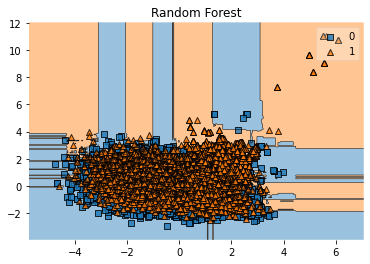

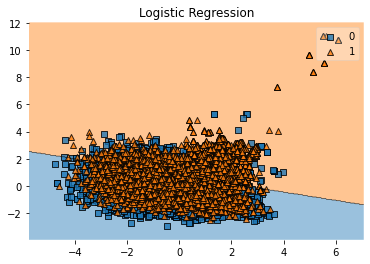

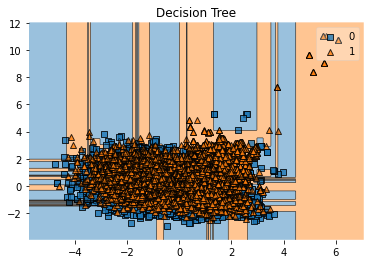

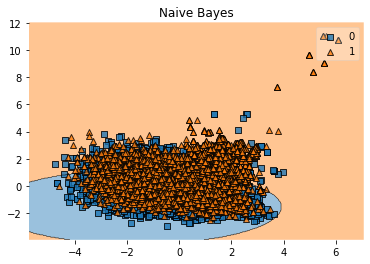

Fitting 4 classifiers...
Fitting clf1: randomforestclassifier (1/4)
RandomForestClassifier(max_depth=100)
Fitting clf2: logisticregression (2/4)
LogisticRegression(C=10, class_weight='none', max_iter=500, random_state=10)
Fitting clf3: decisiontreeclassifier (3/4)
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, max_features='auto')
Fitting clf4: gaussiannb (4/4)
GaussianNB()


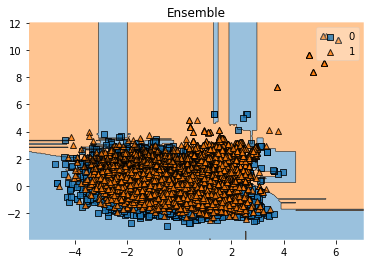

In [133]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class Model: 
    def __init__(self, model, label):
        self.model = model
        self.label = label

models = [
   # Model(knn_clf.best_estimator_,"KNN"),
    Model(rf_clf.best_estimator_,"Random Forest"),
    Model(lg_clf.best_estimator_, "Logistic Regression"),
    Model(dt_clf.best_estimator_, "Decision Tree"),
    Model(clf_gnb, "Naive Bayes"),
]

eclf = EnsembleVoteClassifier(clfs = [rf_clf.best_estimator_,lg_clf.best_estimator_,dt_clf.best_estimator_,clf_gnb], verbose = 2)

models = [*models,  Model(eclf, "Ensemble")]



def visual_ml(X_test, y_test,*models):
    y_test = np.array(y_test, dtype = np.uint)
    pca = PCA(n_components = 2)
    X_test = pca.fit_transform(X_test)
   
    #models.append(Model(eclf,'Ensemble'))
    
    for model in models:
        model.model.fit(X_test, y_test)
        plt.figure()
        fig = plot_decision_regions(X=X_test, y=y_test, clf=model.model)
        plt.title(model.label)
        plt.show()
        plt.close()
        
visual_ml(X_test, y_test,*models)

#### Regression - Visualizing mlxtend results with different models
- We display bar chart to compare the our evaluation metrics, MAE, MAPE and RMSE. Based on the graph and the table, SVR did better on MAE and MAPE evaluation but Lasso did best on the RMSE. Linear regression did poorly in overall.
- We also made the regression plots for all models. We applied PCA to reduce the dimensions and plot the graph. As the evalution metrics showed SVR and Lasso did the best, the graph of SVR and Lasso drew the line that pass the center of the scatter plot.

In [134]:
# Intitialise data of lists  
evalScore = [svrMeanScores, linearMeanScores, lassoMeanScores] 
  
# Creates padas DataFrame by passing  
# Lists of dictionaries and row index. 
regEval = pd.DataFrame(evalScore, index =['Support Vector', 'Linear', 'Lasso']) 
regEval

,MAE,MAPE,RMSE
Support Vector,22.207733,20.609851,29.574906
Linear,32.770277,24.899187,41.879391
Lasso,21.933402,18.959928,28.692361


<AxesSubplot:xlabel='Regression', ylabel='Results'>

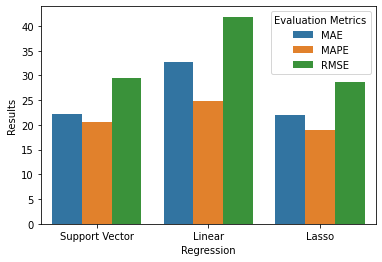

In [135]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

regEval = regEval.stack().reset_index()
regEval.columns = ['Regression', 'Evaluation Metrics', 'Results']
sns.barplot(y='Results', x='Regression', hue='Evaluation Metrics', data=regEval)

In [175]:
for train_indices, test_indices in cv_reg.split(X_reg_train,y_reg_train): 
    X_train = X_reg_sel.iloc[train_indices]
    y_train = y_reg.iloc[train_indices]
    
    X_test = X_reg_sel.iloc[test_indices]
    y_test = y_reg.iloc[test_indices]

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  47 tasks      | elapsed:   10.3s
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:   19.5s finished


<Figure size 432x288 with 0 Axes>

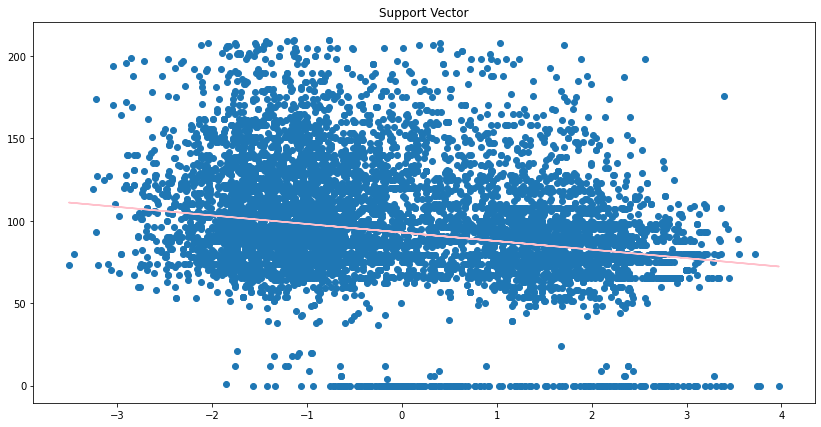

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


<Figure size 432x288 with 0 Axes>

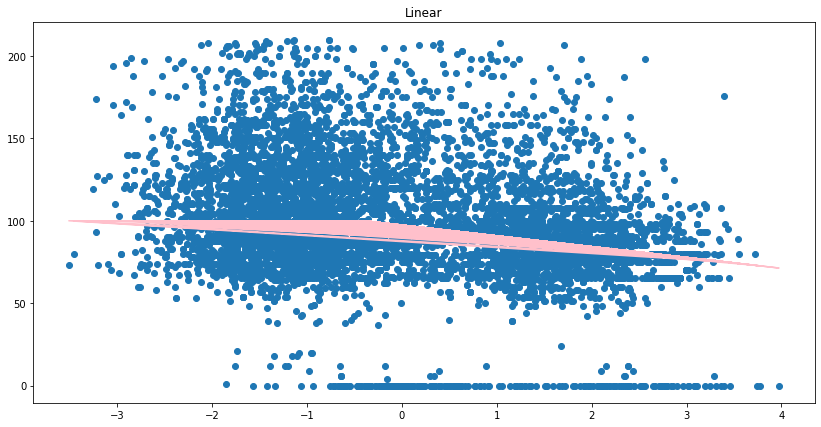

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.3s finished


<Figure size 432x288 with 0 Axes>

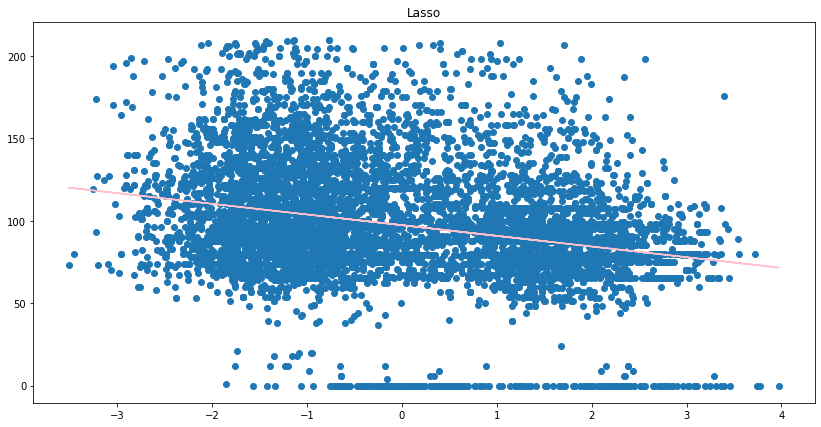

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.4s finished


<Figure size 432x288 with 0 Axes>

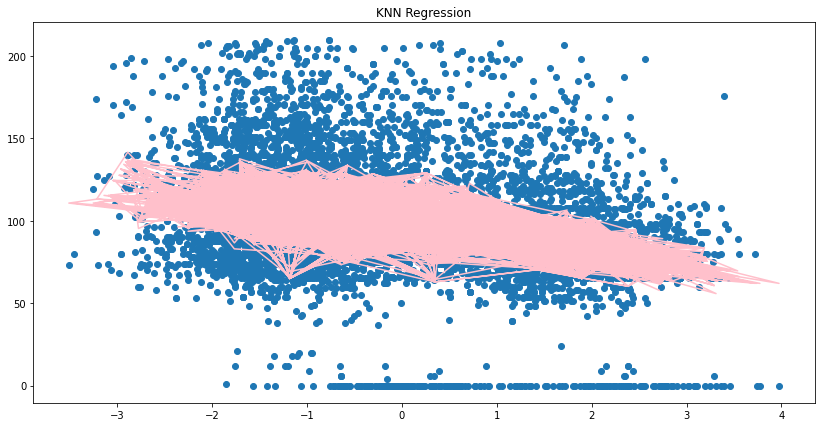

In [178]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
def visual_ml(svr, linear, lasso, knn_reg, X_test, y_test):
    y_test = np.array(y_test, dtype = np.uint)
    pca = PCA(n_components = 1)
    X_test = pca.fit_transform(X_test)
    labels = ['Support Vector',
          'Linear',
          'Lasso',
        'KNN Regression']
    
    for clf, lab in zip([svr, linear, lasso, knn_reg], labels):
        plt.figure()
        #fig = plot_decision_regions(X=X_test, y=y_test, clf=clf)
        fig, ax = plt.subplots(figsize=(14, 7))
        ax.plot(X_test, clf.fit(X_test, y_test).predict(X_test), color='pink')
        ax.scatter(X_test, y_test)
        plt.title(lab)
        plt.show()
        plt.close()
visual_ml(svr, linearReg, lassoReg,knn_reg,  X_test, y_test)

### Part 5: Model Comparison <a id='model-and-evaluation5'/>

### `Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.`

#### Comparing Classification Models

##### ROC Curve

In [180]:
class ClasModel(Model): 
    def __init__(self, model, label):
        super().__init__(model, label)
    
    def predict_proba(self,x_values):
        return self.model.predict_proba(x_values)

In [182]:
clas_models = [ClasModel(rf_clf.best_estimator_,"Random Forest"),
               ClasModel(lg_clf.best_estimator_,"Logistic Regression"),
               ClasModel(dt_clf.best_estimator_,"Decision Tree"),
               #ClasModel(knn_clf.best_estimator_,"KNN")
              ]


def visualize_roc_curve(X_test_values, y_test_values, *models):
    plt.figure(figsize=(12,4))
    for model in models:
        yhat_scores = model.predict_proba(X_test_values)
        fpr, tpr, _ = mt.roc_curve(y_test_values.ravel(),yhat_scores[:,1])
        roc_auc = mt.auc(fpr, tpr)
        plt.plot(fpr, tpr,
         label= model.label + '(area = {0:0.2f})'
               ''.format(roc_auc))
        
    plt.legend(loc="lower right")  
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()    

    
visualize_roc_curve(X_clas_test, y_clas_test, *clas_models)


ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 13 

<Figure size 864x288 with 0 Axes>

##### Precission-Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

def visualize_precission_recall_curve(X_test_values, y_test_values, *models):
    plt.figure(figsize=(12,4))
    for model in models:
        yhat_scores = model.predict_proba(X_test_values)
        precision, recall, _ = mt.precision_recall_curve(y_test_values.ravel(),yhat_scores[:,1])
        roc_auc = mt.auc(recall, precision)
        plt.plot(precision, recall,
         label= model.label + '(area = {0:0.2f})'
               ''.format(roc_auc))
        
    plt.legend(loc="lower right")  
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()    

    
visualize_precission_recall_curve(X_clas_test, y_clas_test, *clas_models)


##### Logistic Regression vs Random Forest

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.subtitle()
yhat= knn_fit.best_estimator_.predict(X_clas_test)
total_accuracy = mt.accuracy_score(y_clas_test, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y_clas_test,yhat,title="Random Forest")

##### Logistic Regression vs KNN

Logistic is quick to train in contrast to KNN specially with a large number of features. Logistic is also quick to generate predictions in contrast to KNN which depending on the number of neighbors it has to look at might take a while to generate prediction. Additionally if data has a lot of noice KNN is better for determining the classification

##### Logistic Regression vs Decision Tree

In Comparison to logistic it takes more time to generate a model using Decision Tree, however just like the logistic model it is quick to generate predictions. 


##### Logistic Regression vs Naive Bayes

Naive Bayes is the faster of the two models as it is a parametric model. Naive Bayes has some poor assumptions that lead to poor performance with data imbalance. 

##### KNN vs Random Forest

Both models are expensive to run, but they are both great at handling large number of training examples, however KNN has dificulties with large number of attribures or dimensions whereas Random Forest is can handle large number of dimensions/attributes. For our data both these models performed well, however KNN took significantly longer to train. 

##### KNN vs Decision Tree
Both are non-parametric, however decision tree supports feature interaction. KNN is more expensive for training the model . 


##### KNN vs Naive Bayes
Naive is non-parametric which means training the model is much quicker. For our use case KNN provided better accuracy and recall compared to Naive Bayes

##### Decision Tree vs Random Forest

##### Decision Tree vs Naive Bayes

##### Random Forest vs Naive Bayes

#### Comparing Regression Models

#### Statistical approach (using mlxtend), alpha = 0.05
Using the mlxtend package, we delved into the statistical significance in performance difference among different pairs of regression models. From the results below, __XXX__ performed significantly better than the rest of the regression models discussed above (Linear, Lasso, Support Vector Regression, KNN Regression). 

##### Linear vs Lasso
- Since p(X.XXX) < a (0.05), we __XXX__ the null hypothesis that both algorithms perform equally well on the dataset. Thus we find the performance difference between the two models to be __XXX__. 

In [31]:
from mlxtend.evaluate import paired_ttest_5x2cv
    
t, p = paired_ttest_5x2cv(estimator1=linearReg,
                          estimator2=lassoReg,
                          X=X_reg_test, y=y_reg_test,
                          random_seed=10)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

NameError: name 'linearReg' is not defined

##### Linear vs SVR
- Since p(X.XXX) < a (0.05), we __XXX__ the null hypothesis that both algorithms perform equally well on the dataset. Thus we find the performance difference between the two models to be __XXX__. 

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
    
t, p = paired_ttest_5x2cv(estimator1=linearReg,
                          estimator2=svr,
                          X=X_reg_test, y=y_reg_test,
                          random_seed=10)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

##### Linear vs KNN
- Since p(X.XXX) < a (0.05), we __XXX__ the null hypothesis that both algorithms perform equally well on the dataset. Thus we find the performance difference between the two models to be __XXX__. 

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
    
t, p = paired_ttest_5x2cv(estimator1=linearReg,
                          estimator2=knn_reg,
                          X=X_reg_test, y=y_reg_test,
                          random_seed=10)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

##### Lasso vs SVR
- Since p(X.XXX) < a (0.05), we __XXX__ the null hypothesis that both algorithms perform equally well on the dataset. Thus we find the performance difference between the two models to be __XXX__. 

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
    
t, p = paired_ttest_5x2cv(estimator1=lassoReg,
                          estimator2=svr,
                          X=X_reg_test, y=y_reg_test,
                          random_seed=10)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

##### Lasso vs KNN
- Since p(X.XXX) < a (0.05), we __XXX__ the null hypothesis that both algorithms perform equally well on the dataset. Thus we find the performance difference between the two models to be __XXX__. 

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
    
t, p = paired_ttest_5x2cv(estimator1=lassoReg,
                          estimator2=knn_reg,
                          X=X_reg_test, y=y_reg_test,
                          random_seed=10)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

##### SVR vs KNNR
- Since p(X.XXX) < a (0.05), we __XXX__ the null hypothesis that both algorithms perform equally well on the dataset. Thus we find the performance difference between the two models to be __XXX__. 

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
    
t, p = paired_ttest_5x2cv(estimator1=svr,
                          estimator2=knn_reg,
                          X=X_reg_test, y=y_reg_test,
                          random_seed=10)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

### Part 6: Feature Importance <a id='model-and-evaluation6'/>

###### Which attributes from your analysis are most important?
###### Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.*


# Deployment <a id='deployment'/>

### Q1. ` How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?`
 	
- In order to __reduce the uncertainty__ arising from booking cancellations, machine learning models for the prediction of a booking’s cancellation were developed. 
- Booking cancellation models will help identify the likelihood of bookings cancellations and enable hotel managers to __take preventative measures to avoid__ these potential cancellations. The measures could be offering services, discounts and other perks. 
- The prediction model enable hotel managers to __mitigate revenue loss__ coming from cancellations with reallocation costs, cash or service compensations.
- Our dataset is time series data limited only from 2015 to 2017. For that reason, the models can be used for micro study of the hotel booking but it is still robust considering the generality of the dataset features that are still relevant nowadays.   


### Q2. `How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? `


   Model's value can be measured after implementing the models with the following:
   - Staff feedback on how fluid their inventory allocation has become.  
   - Revenue management KPIs such as Occupancy rate, revenue per available room, can tell how much their financial loss arising from cancellations has improved. 
   - Both quantative and qualitative feedback from customers on online reviews such as google, yelp, bookings.com, and trivago. 


   Deployment method:
   - First, we need a corporate database that connects the central booking system integrated with the prediction models as well as distribution channels, such as online tour agency. 
   - The models should be integrated with the central booking system so that the new information input(cancellation, bookings) from distribution channels can be processed through the prediction models and enables the hotel manager to act upon the model outcome. 
   - The prediction outcome on adr(average daily rate) and cancellations can be accessed by the hotel manager and can be fed back into the distribution channel with the manager's proactive measure such as offering discounts. 

    

### Q3.  `What other data should be collected?`

- The type of the hotel was intially limited to either city or resort and was concluded insiginificant for the purpose of this study. If there are more options provided in the data, it could be a determining factor. 
- Weather information can be very useful as travel can be deterred, thus contributing to the cancellation. 
- Quantifiable general sentiment about each specific hotel, such as google reviews, can become an important feature coming from the customer's end. 
- General information about the customer such as age. It is important to take proactive measures differently according to different backgrounds of the customers. For example, offering amusement park discounts to a family group vs ski resort discounts to a young couple vs massage/spa ticket to a senior couple. 


### Q4. ` How often would the model need to be updated, etc.?`

   Classification models for cancellations:
   - __Lead_time__, which is the number of days to arrival since the booking was placed, is the most weighted and important feature in the classification models. 
   - This suggests that the ability of the hotel manager to quickly act upon the booking placement greatly affects the cancellations. Thus the model should be updated every time the manager takes actions upon the booking and receives feedback from the distribution channels on whether the booking will be cancelled or not.
   - Also __deposit_type__ is the second most important feature. Everytime there is deposit made, the model should be updated. 
   
   Regression models for adr(average daily rate):
   - The two most important features for the regression model, which are __arrival_date_week_number__ and __reserved_room_type__, are known and can be accessed by the hotel manager at the time of booking. Thus the regression models need to be updated as soon as there is new booking received in the hotel's central booking system. 

# Exceptional Work <a id='exceptional-work'/>

*You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?*